### CVRP - modelo em Toth e Vigo, pg. 5 e 6 (MTZ formulation)

In [1]:
# Importando as bibliotecas:

from docplex.mp.model import Model
from docplex.util.environment import get_environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)

sns.set_style('whitegrid')

# criando o modelo:

MTZ = Model(name='MTZ')

In [2]:
# Rodando o programa com funções de ler instâncias e calcular distâncias entre nós:

%run utils

In [3]:
# organizando alguns parâmetros:

instancia = 'P-n20-k2' # Nome da instância

df, parameters = CVRP_intancia('instances\CVRP\P\{}.vrp'.format(instancia))

coords = df[['X','Y']] # coordenadas cartesianas de cada nó "i"

q = df['qtd'] # demanda de cada nó "i"

K = parameters['K'] # número de veículos

Q = parameters['Q'] # capacidade dos veículos (frota homogênea)

N = len(coords) # número de nós (considerando o depósito central!)

c = np.matrix(matriz_2d_distancias('CVRP',coords)) # custo de transporte, do cliente "i" para o cliente "j"


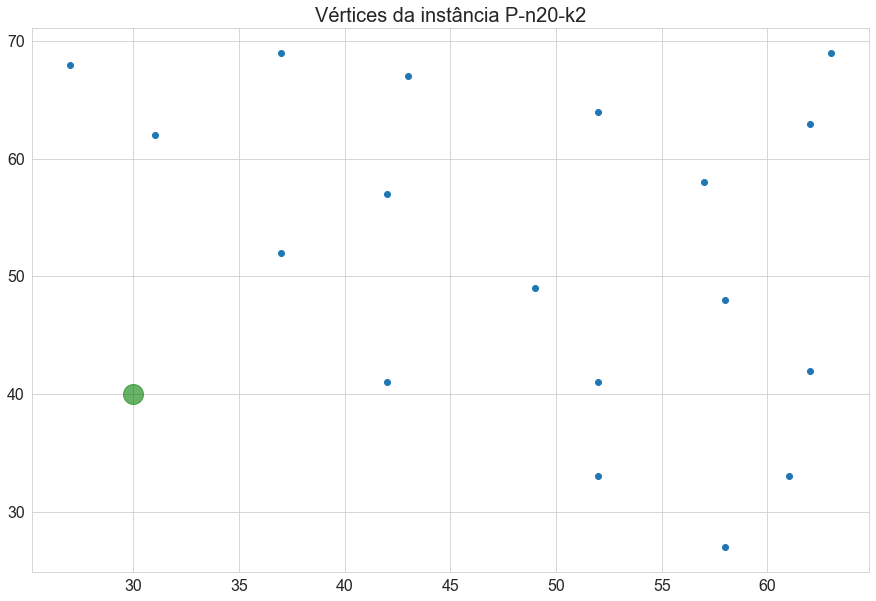

In [4]:
# Visualizando vértices da instância:

plt.figure(figsize=(15,10))

plt.scatter(x=df['X'].iloc[0],y=df['Y'].iloc[0], color='green', s=400.0, alpha=0.6)

plt.scatter(x=df['X'].iloc[1:len(df)-1],y=df['Y'].iloc[1:len(df)-1], alpha=1)

plt.title('Vértices da instância {}'.format(instancia), fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)

plt.show()


#### Variáveis de decisão:

In [5]:
# Variável de decisão:

# x_{ij}: variável binária igual a 1 se um veículo vai do nó "i" para o nó "j" (modelo de 2 índices)

x = MTZ.binary_var_matrix(range(N), range(N), name='x') # 0 representa o depósito!

# u_{i}: variável contínua que diz respeito à demanda acumulada (já atendida) do veículo ao visitar o nó "i":

u = MTZ.continuous_var_list(range(N), name='u')

## Modelo


#### Função objetivo

## $$ min \displaystyle \sum_{(i,j) \in A}c_{ij}x_{ij}$$

In [6]:
# Criando uma variável para a equação do custo total:

custo_total = MTZ.sum(c[i,j]*x[i,j] for i in range(N) for j in range(N))

In [7]:
# Atribuindo a equação ao modelo

MTZ.minimize(custo_total)

#### Restrições


#### I)

## $$ \displaystyle \sum_{j \in N}x_{ij} = 1 ,  \forall i \in N $$
## $$ \displaystyle \sum_{i \in N}x_{ij} = 1 ,  \forall j \in N $$


                    As restrições (I) asseguram que, em uma rota, cada nó é conectado a dois outros nós, isto é, seu sucessor e antecessor. Além disso, elas também asseguram que um nó é visitado apenas uma vez.

In [8]:
for i in range(1,N):
        
        MTZ.add_constraint(MTZ.sum(x[i,j] for j in range(N) if i != j)==1) # considerar a partir de 1 ou a partir de 0?
        
        # o "if" tem que ir no final, nessa sintaxe!

In [9]:
for j in range(1,N):

    MTZ.add_constraint(MTZ.sum(x[i,j] for i in range(N)if i != j)==1) # considerar a partir de 1 ou a partir de 0?


#### II)

## $$ \displaystyle \sum_{j \in N}x_{0j} = |K| $$


                    As restrições (II) asseguram que exatamente "K" veículos são utilizados (o mesmo que dizer que exatamen-te "K" rotas são construídas).

In [10]:
MTZ.add_constraint(MTZ.sum(x[0,j] for j in range(1,N)) == K)

docplex.mp.LinearConstraint[](x_0_1+x_0_2+x_0_3+x_0_4+x_0_5+x_0_6+x_0_7+x_0_8+x_0_9+x_0_10+x_0_11+x_0_12+x_0_13+x_0_14+x_0_15+x_0_16+x_0_17+x_0_18+x_0_19,EQ,2)


#### III)

## $$ u_{i} - u_{j} + Qx_{ij} \leq Q - q_{j}, \forall (i,j) \in A $$

## $$ q_{i} \leq u_{i} \leq Q, \forall i \in N$$


                    As restrições (III) asseguram que não haja sub-rotas e que as capacidades dos veículos não sejam excedi-das.

In [11]:
for i in range(N):
    
    for j in range(1,N):
        
            if (i!=j):

                MTZ.add_constraint(u[j] >= u[i] + q.loc[j+1]-(1-x[i,j])*Q)

In [12]:
for i in range(1,N):
    MTZ.add_constraint(q.loc[i+1] <= u[i])
    MTZ.add_constraint(u[i] <= Q)

In [ ]:
# MTZ.clear_constraints()

In [13]:
MTZ.solve(log_output=True)

Version identifier: 20.1.0.0 | 2020-11-10 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1
CPXPARAM_RandomSeed                              202001241
Tried aggregator 1 time.
MIP Presolve eliminated 57 rows and 21 columns.
Reduced MIP has 381 rows, 399 columns, and 1767 nonzeros.
Reduced MIP has 380 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (1.14 ticks)
Found incumbent of value 483.769320 after 0.02 sec. (2.16 ticks)
Probing time = 0.02 sec. (1.57 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 381 rows, 399 columns, and 1767 nonzeros.
Reduced MIP has 380 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (1.34 ticks)
Probing time = 0.02 sec. (1.59 ticks)
Clique table members: 209.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root relaxation solution time = 0.00 sec. (0.77 ticks)

        Nodes         

docplex.mp.solution.SolveSolution(obj=217.416,values={x_0_1:1,x_0_4:1,x_..

In [14]:
# colocando todas as variáveis x em uma lista:

variaveis = [valor for valor in list(MTZ.solution.as_df()['name']) if 'x' in valor] 

# obtendo listas com os arcos da rota ótima (tratando possíveis erros)

arcos = [list(map(int,variaveis[i].replace('x','').replace('_','\n').split())) for i in range(len(variaveis))]

arcos_iniciais = [arco for arco in arcos if arco[0] == 0]

lista_rotas = list()

for arco in arcos_iniciais:
    
    rota = [0]
    
    no_seguinte = arco[1]
    
    rota.append(no_seguinte)
    
    while no_seguinte != 0:
        
        no_seguinte = [arco[1] for arco in arcos if arco[0] == no_seguinte][0]
        
        rota.append(no_seguinte)
    
    lista_rotas.append(rota)

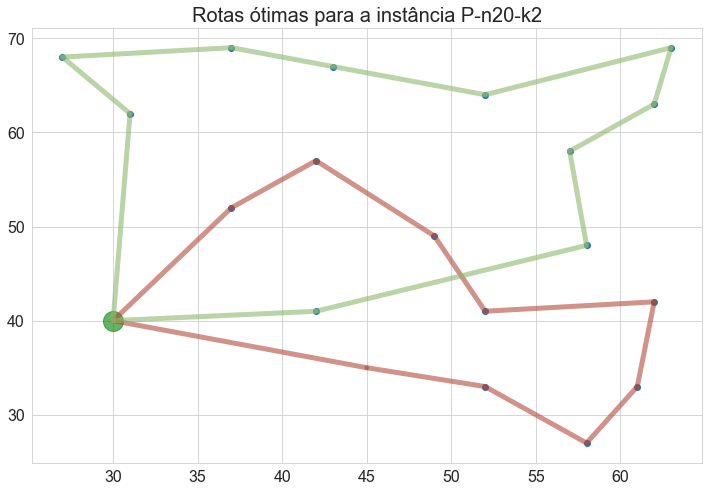

In [15]:
# Código para o plot

plt.figure(figsize=(12,8))

plt.scatter(x=df['X'].iloc[0],y=df['Y'].iloc[0], color='green', s=400.0, alpha=0.6)

plt.scatter(x=df['X'].iloc[1:len(df)-1],y=df['Y'].iloc[1:len(df)-1], alpha=1)


for rota in lista_rotas:
    
    cor = np.random.rand(3,)
    
    for index in range(len(rota) - 1):
        
        x_i = df['X'].iloc[rota[index]]

        x_j = df['X'].iloc[rota[index+1]]

        y_i = df['Y'].iloc[rota[index]]

        y_j = df['Y'].iloc[rota[index+1]]

        plt.plot((x_i,x_j),(y_i,y_j), c=cor, linewidth=5, alpha=0.6)
            

plt.title('Rotas ótimas para a instância {}'.format(instancia), fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.show()